## Описание проекта

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Цель проекта: 

Провести разведывательный анализ данных и составить отчет по результатам, чтобы определиться с параметрами будущей модели, предсказывающей результаты госэкзамена по математике для каждого ученика школы.

## Этапы выполнения работы:
1. Первичная обработка данных
2. Анализ и обработка данных в столбцах
3. Корреляционный анализ количественных переменных
4. Анализ номинативных переменных
5. Выводы

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')  # загружаем датасет в переменную

In [2]:
''' Функция вывода графика seaborn.countplot '''


def count_plot(column, size=(5, 5), rotx=0):
    plt.figure(figsize=size)     # размер области графика
    sns.set(style='darkgrid',    # стиль фона графиков в seaborn
            font_scale=1.2)      # размер шрифта для лучшей читаемости
    plot = sns.countplot(data=stud_math, x=column)   # объект с графиком
    for xlabel in plot.get_xticklabels():  # цикл с метками на оси x
        xlabel.set_rotation(rotx)          # поворот меток на угол rotx
    return plot.set_title(column, size=20)


''' Функция вывода количества пропущенных значений, а также 
какие уникальные есть и их количество '''


def data_quality(column):
    # подсчитаем число пропущенных значений
    nan_entrys = stud_math[column].isnull().sum()
    # выведем количество пропущенных значений
    return (print('Для показателя', column, 'количество пропущенных значений:',
                  nan_entrys, 'из', len(stud_math),
                  '\nПропущенных значений',
                  round(nan_entrys/len(stud_math)*100, 1), '%'),
            display(stud_math[column].value_counts()))


''' Вывод информации по колонке '''


def display_data(column, size=(5, 5)):

    data_quality(column)
    count_plot(column, size)


''' Функция определения границ выбросов '''


def outliers(column):
    IQR = stud_math[column].quantile(0.75) - stud_math[column].quantile(0.25)
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


''' Функция вывода графика seaborn.boxplot '''


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


''' Функция перевода колонки в бинарный вид '''


def yes_no(column):
    stud_math[column].replace('yes', 1, inplace=True)
    stud_math[column].replace('no', 0, inplace=True)


''' Функция статистически значимых различий '''


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [3]:
display(stud_math.head(10))  # выведем краткую информацию о датасете
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus',
                     'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
                     'traveltime', 'studytime', 'failures', 'schoolsup',
                     'famsup', 'paid', 'activities', 'nursery',
                     'studytime_granular', 'higher', 'internet', 'romantic',
                     'famrel', 'freetime', 'goout', 'health', 'absences',
                     'score']  # переименум колонки

Колонки 'studytime_granular' не было в тех задании, проверим её корреляцию с другой, похожей по названию колонкой 'studytime'

In [5]:
stud_math[['studytime', 'studytime_granular']].corr()

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


'studytime' и 'studytime_granular' полностью скоррелировны, удалим 'studytime_granular'

In [6]:
stud_math.drop(columns=['studytime_granular'], inplace=True)

### Score
score — баллы по госэкзамену по математике

Для показателя score количество пропущенных значений: 6 из 395 
Пропущенных значений 1.5 %


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

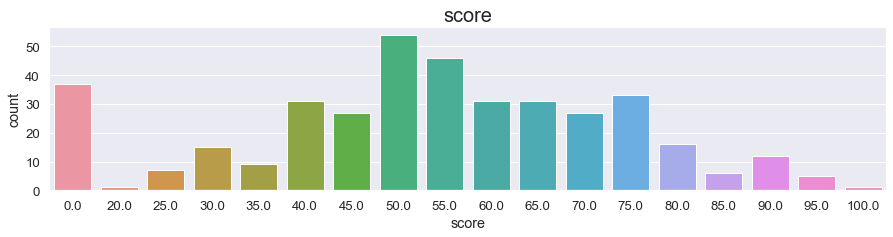

In [7]:
display_data('score', size=(15, 3))  # оценим ключевой показатель

In [8]:
# удалим пропущенные значения, так как 'score' это ключевой показатель
stud_math.dropna(subset=['score'], inplace=True)

In [9]:
# удалим данные с колличеством оценок меньше 5
stud_math = stud_math[(stud_math.score > 20) & (stud_math.score < 100)]

Для показателя score количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


50.0    54
55.0    46
75.0    33
40.0    31
65.0    31
60.0    31
70.0    27
45.0    27
80.0    16
30.0    15
90.0    12
35.0     9
25.0     7
85.0     6
95.0     5
Name: score, dtype: int64

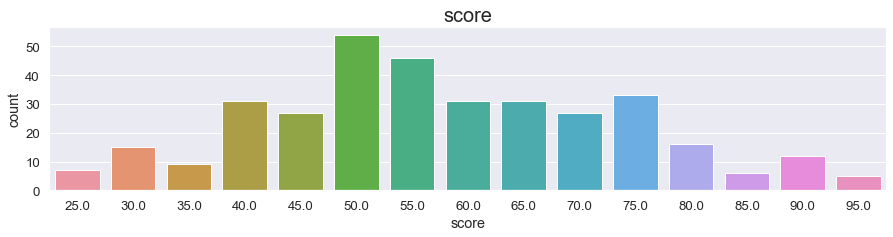

In [10]:
display_data('score', size=(15, 3))

### School
school — аббревиатура школы, в которой учится ученик

Для показателя school количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


GP    309
MS     41
Name: school, dtype: int64

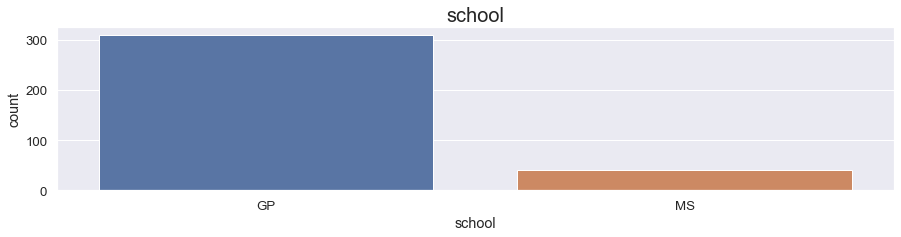

In [11]:
display_data('school', size=(15, 3))

### Sex
sex — пол ученика ('F' - женский, 'M' - мужской)

Для показателя sex количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


F    181
M    169
Name: sex, dtype: int64

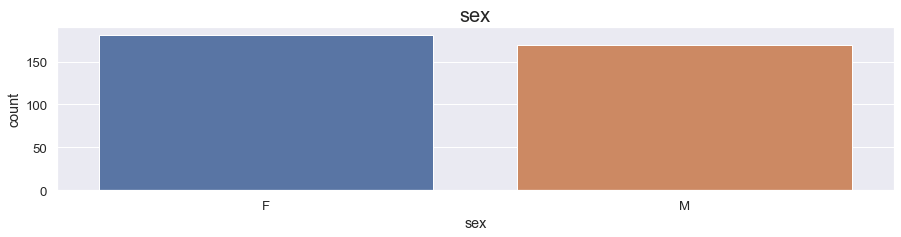

In [12]:
display_data('sex', size=(15, 3))

### Age
age — возраст ученика (от 15 до 22)

Для показателя age количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


16    95
17    89
15    76
18    69
19    16
20     3
21     1
22     1
Name: age, dtype: int64

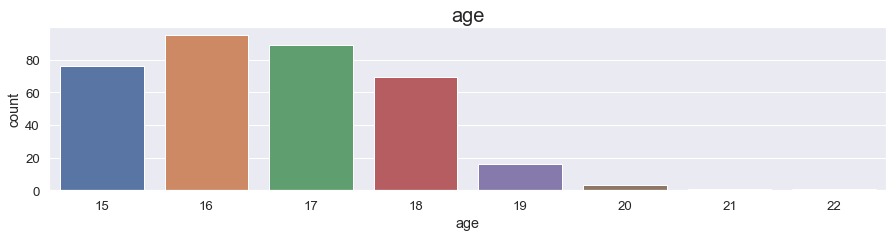

In [13]:
display_data('age', size=(15, 3))

### Address
address — тип адреса ученика ('U' - городской, 'R' - за городом)

Для показателя address количество пропущенных значений: 14 из 350 
Пропущенных значений 4.0 %


U    263
R     73
Name: address, dtype: int64

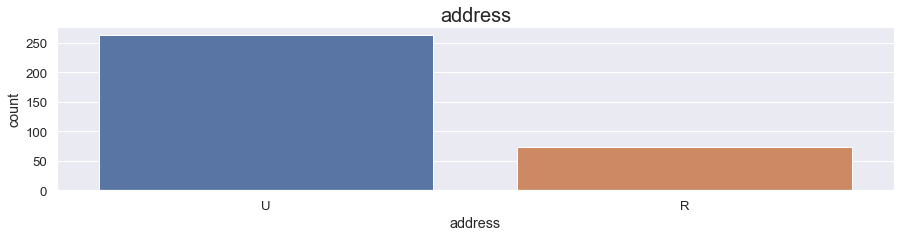

In [14]:
display_data('address', size=(15, 3))

In [15]:
# посмотрим, по каким признакам можно заполнить все пропуски в address
stud_math[stud_math.address.isna()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0
348,GP,F,17,NaN,GT3,T,4.0,3.0,health,other,reputation,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,NaN,4.0,3.0,4.0,0.0,75.0


Большинство учеников, у кого не указано проживает он в городе или за его пределми, в колонке traveltime узакано, что они добираются до школы менее чем за 30 минут. Логично будет предположить, что они проживают в городе. Заменим все пропуски в address на 'U' - городской.

In [16]:
stud_math['address'].fillna('U', inplace=True)

Для показателя address количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


U    277
R     73
Name: address, dtype: int64

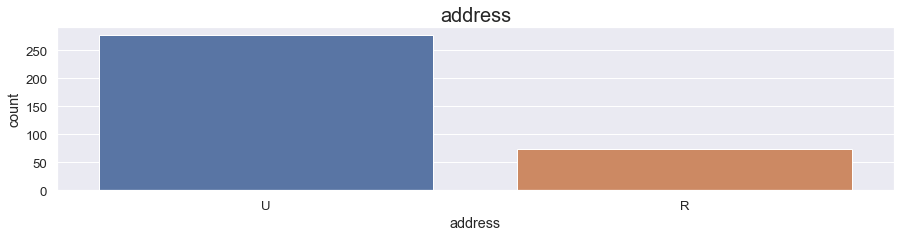

In [17]:
display_data('address', size=(15, 3))

### Famsize 
famsize — размер семьи('LE3' <= 3, 'GT3' >3)

Для показателя famsize количество пропущенных значений: 24 из 350 
Пропущенных значений 6.9 %


GT3    226
LE3    100
Name: famsize, dtype: int64

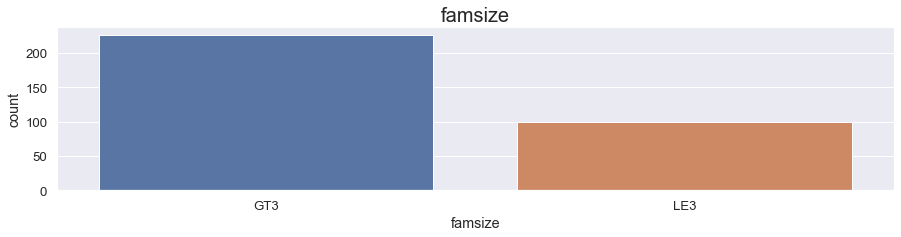

In [18]:
display_data('famsize', size=(15, 3))

In [19]:
stud_math[stud_math.famsize.isna()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
167,GP,F,16,U,NaN,T,4.0,2.0,health,services,home,father,1.0,2.0,0.0,no,NaN,yes,no,yes,yes,yes,yes,4.0,2.0,3.0,3.0,0.0,80.0


Большинство пропущенных значений famsize приходится на полные семьи, следовательно вероятнее всего, что такие пропуски мы можем заполнить доминирующим значением 'GT3'

In [20]:
stud_math['famsize'].fillna('GT3', inplace=True)

Для показателя famsize количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


GT3    250
LE3    100
Name: famsize, dtype: int64

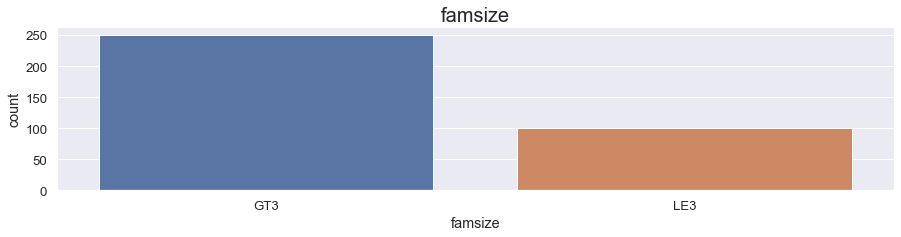

In [21]:
display_data('famsize', size=(15, 3))

### Pstatus
pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Для показателя pstatus количество пропущенных значений: 41 из 350 
Пропущенных значений 11.7 %


T    275
A     34
Name: pstatus, dtype: int64

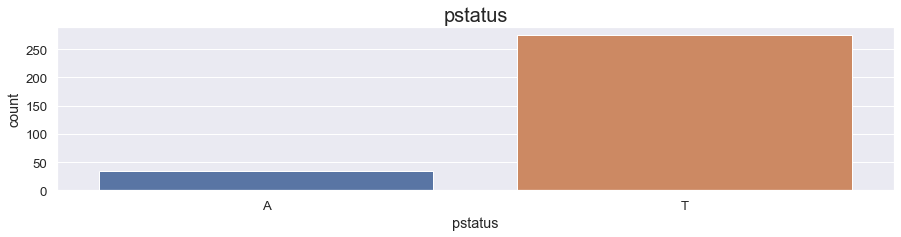

In [22]:
display_data('pstatus', size=(15, 3))

Полнейшее доминирования одного статуса, заполним им пропуски. 

Для показателя pstatus количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


T    316
A     34
Name: pstatus, dtype: int64

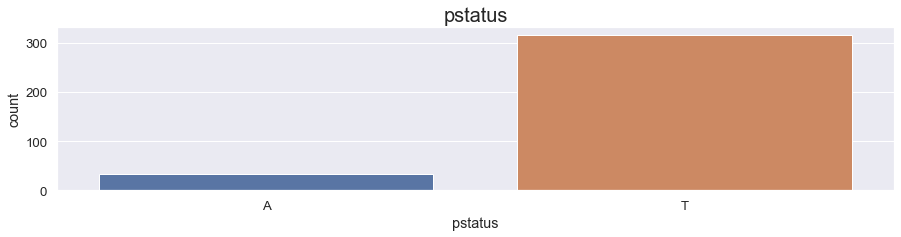

In [23]:
stud_math['pstatus'].fillna('T', inplace=True)
display_data('pstatus', size=(15, 3))

### Medu
medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Для показателя medu количество пропущенных значений: 2 из 350 
Пропущенных значений 0.6 %


4.0    123
2.0     88
3.0     87
1.0     47
0.0      3
Name: medu, dtype: int64

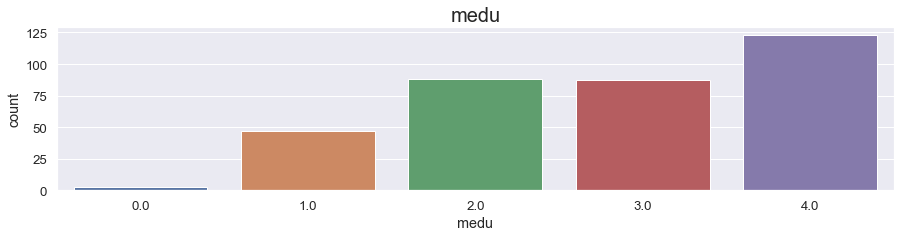

In [24]:
display_data('medu', size=(15, 3))

Всего два пропуска, заполним медианой.

Для показателя medu количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


4.0    123
3.0     89
2.0     88
1.0     47
0.0      3
Name: medu, dtype: int64

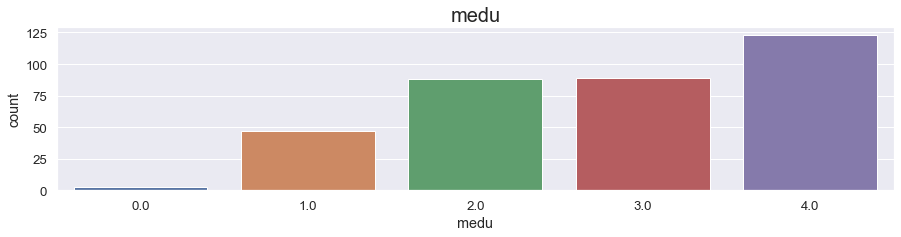

In [25]:
stud_math['medu'].fillna(stud_math['medu'].median(), inplace=True)
display_data('medu', size=(15, 3))

### Fedu
fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Для показателя fedu количество пропущенных значений: 21 из 350 
Пропущенных значений 6.0 %


2.0     94
3.0     87
4.0     80
1.0     65
0.0      2
40.0     1
Name: fedu, dtype: int64

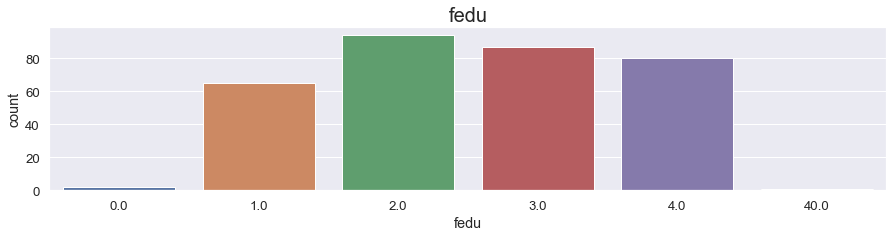

In [26]:
display_data('fedu', size=(15, 3))

Явный выброс это значение 40.0, очевидно, что это опечатка, заменим его на 4.0. Пропуски заполним медианой.

In [27]:
stud_math.fedu = stud_math.fedu.apply(
    lambda x: float(str(x).replace('40', '4')))
stud_math['fedu'].fillna(stud_math['fedu'].median(), inplace=True)

Для показателя fedu количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


3.0    108
2.0     94
4.0     81
1.0     65
0.0      2
Name: fedu, dtype: int64

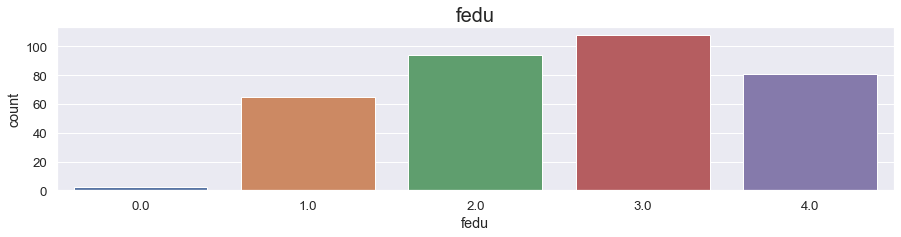

In [28]:
display_data('fedu', size=(15, 3))

### Mjob
mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Для показателя mjob количество пропущенных значений: 17 из 350 
Пропущенных значений 4.9 %


other       114
services     90
teacher      51
at_home      49
health       29
Name: mjob, dtype: int64

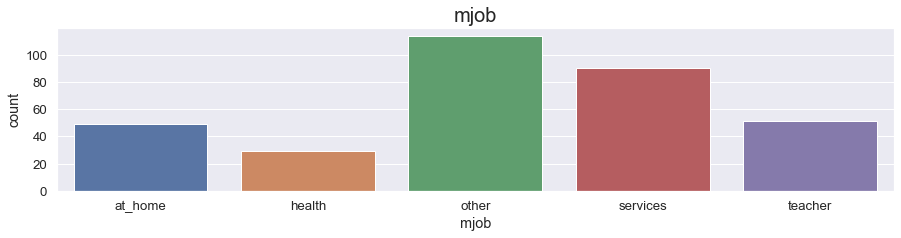

In [29]:
display_data('mjob', size=(15, 3))

Пропуски заменим на 'other'

Для показателя mjob количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


other       131
services     90
teacher      51
at_home      49
health       29
Name: mjob, dtype: int64

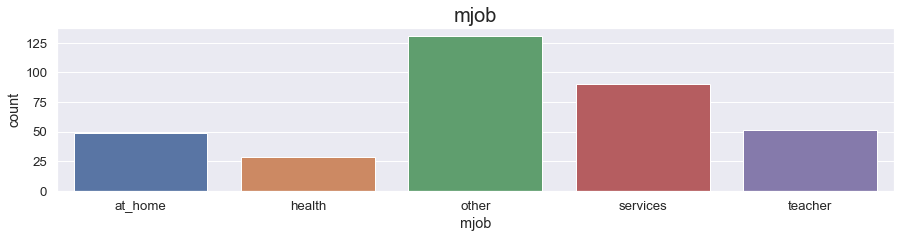

In [30]:
stud_math['mjob'].fillna('other', inplace=True)
display_data('mjob', size=(15, 3))

### Fjob
fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Для показателя fjob количество пропущенных значений: 30 из 350 
Пропущенных значений 8.6 %


other       176
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64

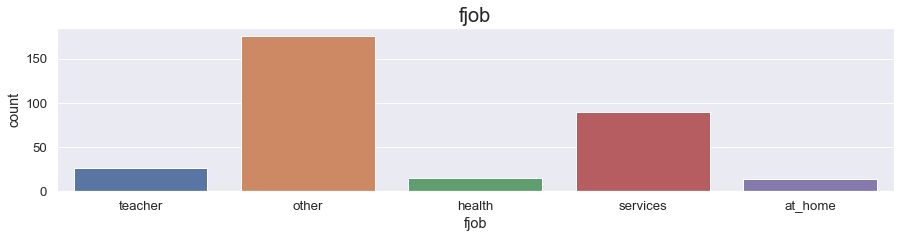

In [31]:
display_data('fjob', size=(15, 3))

Пропуски заменим на 'other'

Для показателя fjob количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


other       206
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64

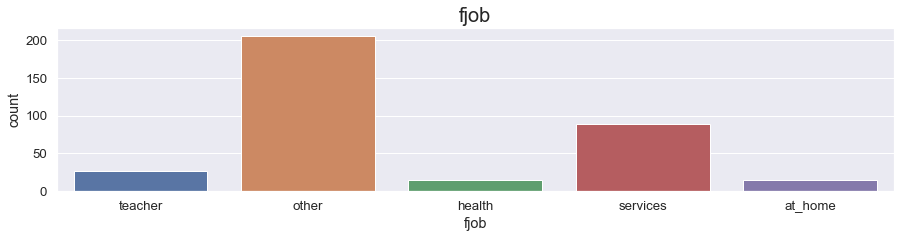

In [32]:
stud_math['fjob'].fillna('other', inplace=True)
display_data('fjob', size=(15, 3))

### Reason
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Для показателя reason количество пропущенных значений: 15 из 350 
Пропущенных значений 4.3 %


course        119
reputation     94
home           89
other          33
Name: reason, dtype: int64

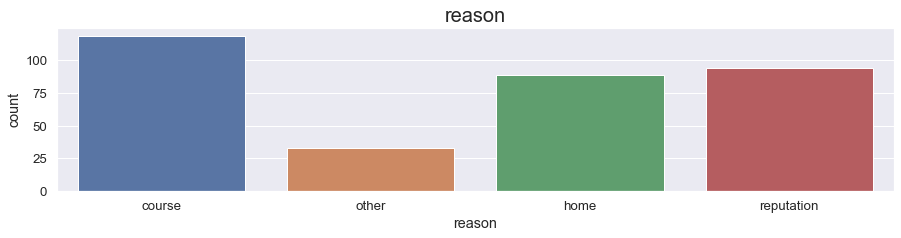

In [33]:
display_data('reason', size=(15, 3))

In [34]:
stud_math[stud_math.reason.isna()]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,T,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
112,GP,F,16,U,GT3,T,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,T,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0
263,GP,F,17,U,GT3,T,3.0,3.0,other,other,NaN,mother,1.0,3.0,0.0,no,no,NaN,yes,no,yes,no,no,3.0,2.0,3.0,4.0,4.0,45.0


Судя по тому, что у большинства на дорогу до школы уходит менее 15 минут и плюс нам известно, практически у всех из них много свободного времени, делаем вывод, что пропуски можно заполнить как 'home'.

Для показателя reason количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


course        119
home          104
reputation     94
other          33
Name: reason, dtype: int64

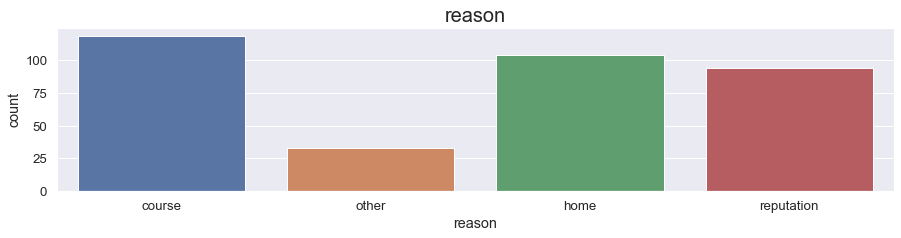

In [35]:
stud_math['reason'].fillna('home', inplace=True)
display_data('reason', size=(15, 3))

### Guardian
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Для показателя guardian количество пропущенных значений: 29 из 350 
Пропущенных значений 8.3 %


mother    223
father     78
other      20
Name: guardian, dtype: int64

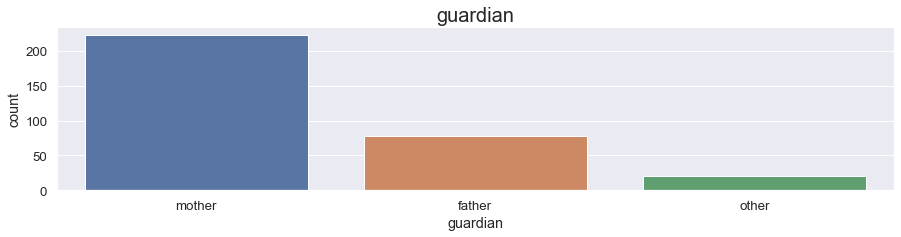

In [36]:
display_data('guardian', size=(15, 3))

Заполним пропуски 'mother'

Для показателя guardian количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


mother    252
father     78
other      20
Name: guardian, dtype: int64

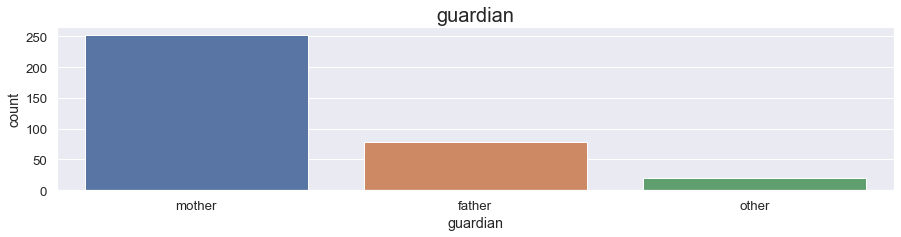

In [37]:
stud_math['guardian'].fillna('mother', inplace=True)
display_data('guardian', size=(15, 3))

### Traveltime
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Для показателя traveltime количество пропущенных значений: 23 из 350 
Пропущенных значений 6.6 %


1.0    217
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

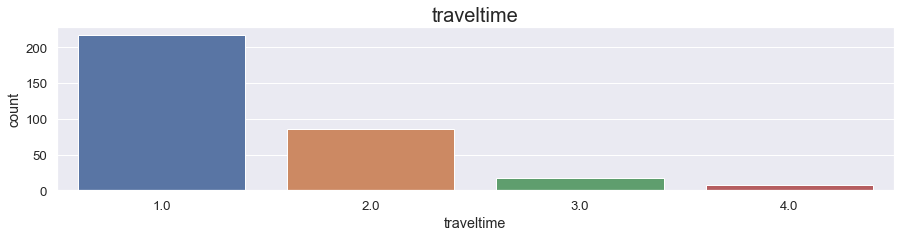

In [38]:
display_data('traveltime', size=(15, 3))

Заменим пропуски медианой.

Для показателя traveltime количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


1.0    240
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

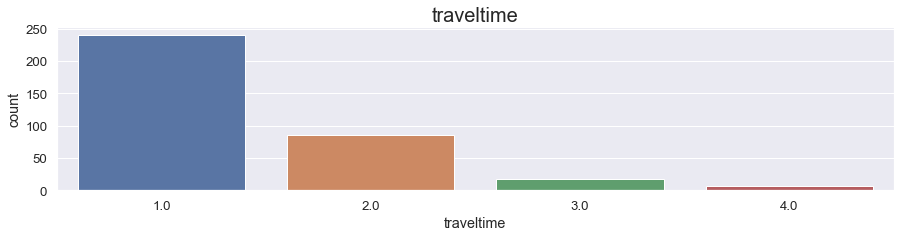

In [39]:
stud_math['traveltime'].fillna(stud_math['traveltime'].median(), inplace=True)
display_data('traveltime', size=(15, 3))

### Studytime
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Для показателя studytime количество пропущенных значений: 7 из 350 
Пропущенных значений 2.0 %


2.0    172
1.0     90
3.0     58
4.0     23
Name: studytime, dtype: int64

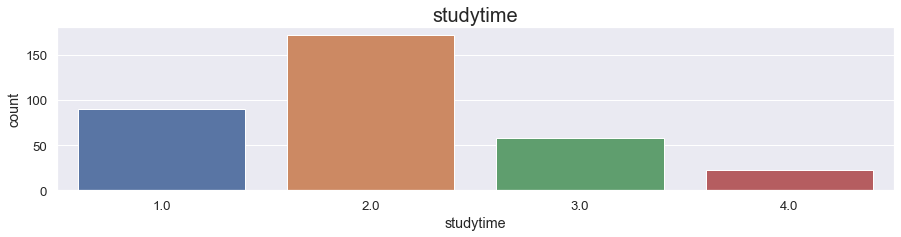

In [40]:
display_data('studytime', size=(15, 3))

Заменим пропуски медианой.

Для показателя studytime количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


2.0    179
1.0     90
3.0     58
4.0     23
Name: studytime, dtype: int64

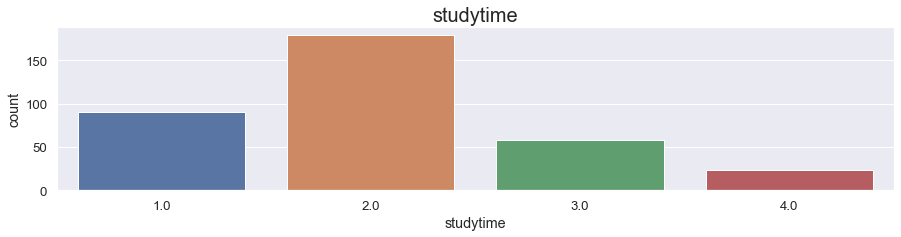

In [41]:
stud_math['studytime'].fillna(stud_math['studytime'].median(), inplace=True)
display_data('studytime', size=(15, 3))

### Failures
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

Для показателя failures количество пропущенных значений: 20 из 350 
Пропущенных значений 5.7 %


0.0    272
1.0     38
2.0     10
3.0     10
Name: failures, dtype: int64

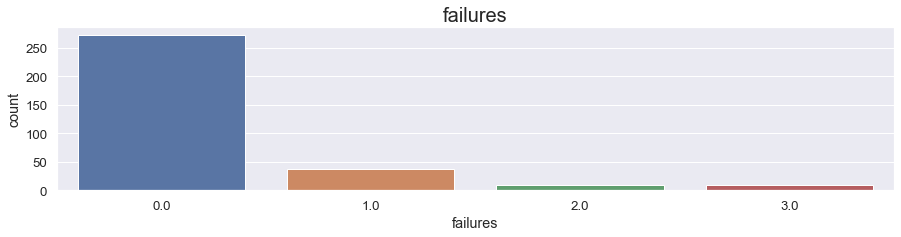

In [42]:
display_data('failures', size=(15, 3))

Заменим пропуски медианой.

Для показателя failures количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


0.0    292
1.0     38
2.0     10
3.0     10
Name: failures, dtype: int64

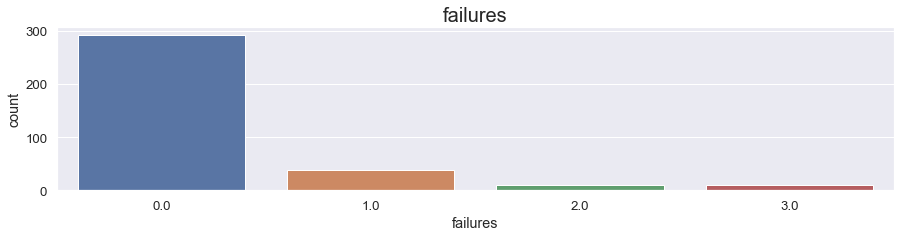

In [43]:
stud_math['failures'].fillna(stud_math['failures'].median(), inplace=True)
display_data('failures', size=(15, 3))

### Schoolsup 
schoolsup — дополнительная образовательная поддержка (yes или no)

Для показателя schoolsup количество пропущенных значений: 9 из 350 
Пропущенных значений 2.6 %


no     293
yes     48
Name: schoolsup, dtype: int64

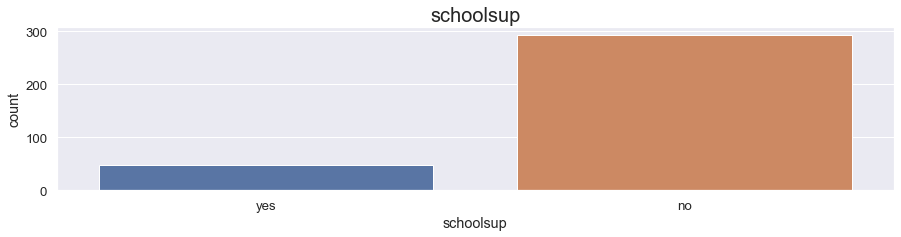

In [44]:
display_data('schoolsup', size=(15, 3))

Заменим пропуски 'no'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя schoolsup количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


0    302
1     48
Name: schoolsup, dtype: int64

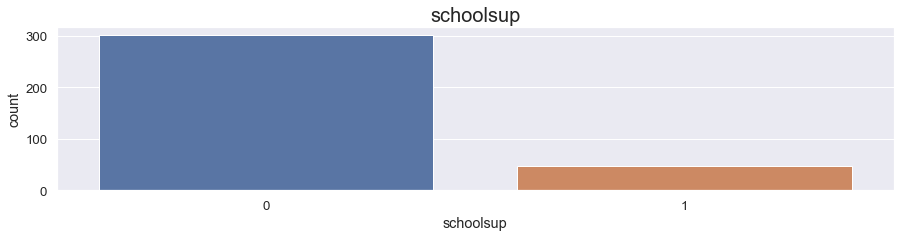

In [45]:
stud_math['schoolsup'].fillna('no', inplace=True)
yes_no('schoolsup')
display_data('schoolsup', size=(15, 3))

### Famsup
famsup — семейная образовательная поддержка (yes или no)

Для показателя famsup количество пропущенных значений: 36 из 350 
Пропущенных значений 10.3 %


yes    196
no     118
Name: famsup, dtype: int64

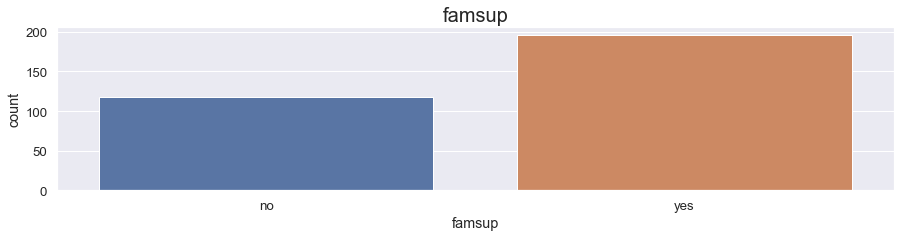

In [46]:
display_data('famsup', size=(15, 3))

Заменим пропуски 'yes'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя famsup количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


1    232
0    118
Name: famsup, dtype: int64

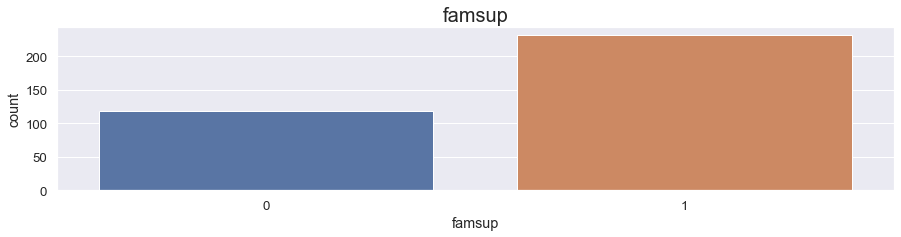

In [47]:
stud_math['famsup'].fillna('yes', inplace=True)
yes_no('famsup')
display_data('famsup', size=(15, 3))

### Paid 
paid — дополнительные платные занятия по математике (yes или no)

Для показателя paid количество пропущенных значений: 36 из 350 
Пропущенных значений 10.3 %


no     169
yes    145
Name: paid, dtype: int64

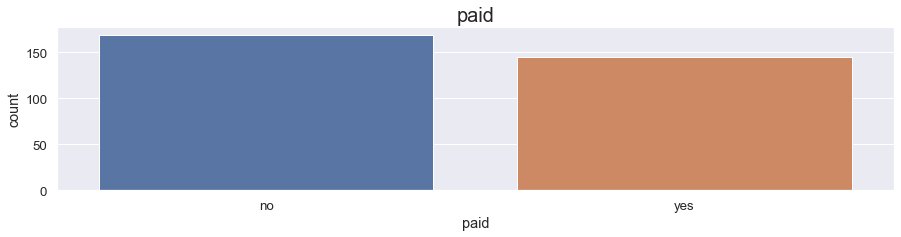

In [48]:
display_data('paid', size=(15, 3))

Заменим пропуски 'no'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя paid количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


0    205
1    145
Name: paid, dtype: int64

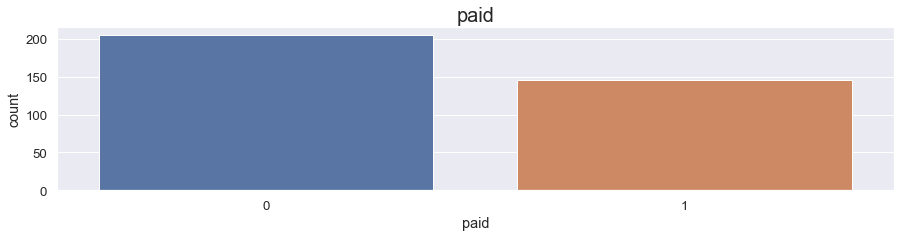

In [49]:
stud_math['paid'].fillna('no', inplace=True)
yes_no('paid')
display_data('paid', size=(15, 3))

### Activities
activities — дополнительные внеучебные занятия (yes или no)

Для показателя activities количество пропущенных значений: 12 из 350 
Пропущенных значений 3.4 %


yes    171
no     167
Name: activities, dtype: int64

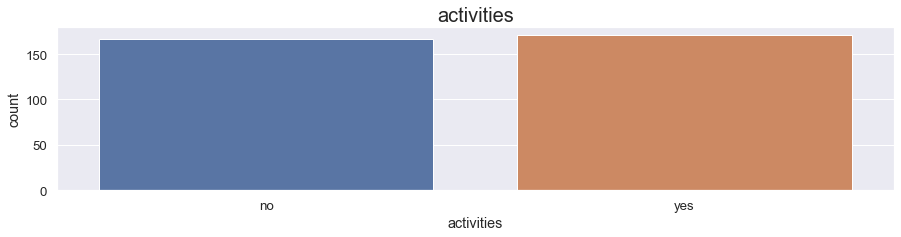

In [50]:
display_data('activities', size=(15, 3))

Заменим пропуски 'yes'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя activities количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


1    183
0    167
Name: activities, dtype: int64

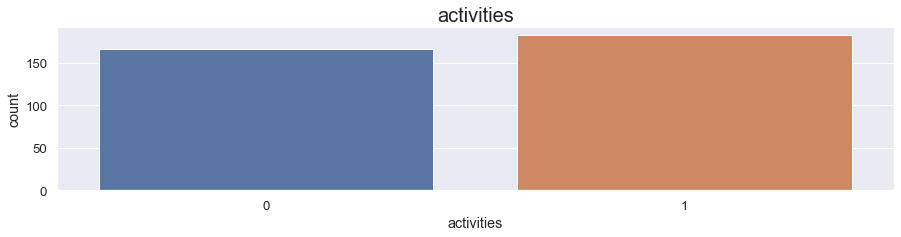

In [51]:
stud_math['activities'].fillna('yes', inplace=True)
yes_no('activities')
display_data('activities', size=(15, 3))

### Nursery
nursery — посещал детский сад (yes или no)

Для показателя nursery количество пропущенных значений: 12 из 350 
Пропущенных значений 3.4 %


yes    270
no      68
Name: nursery, dtype: int64

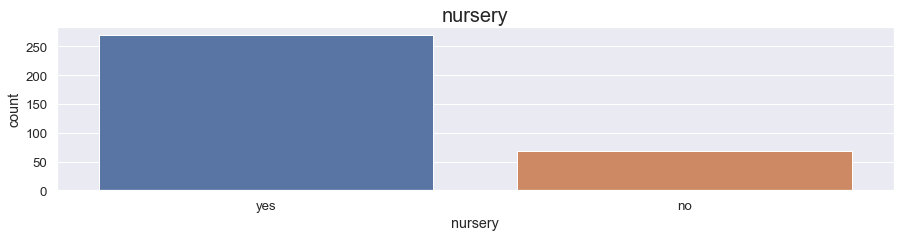

In [52]:
display_data('nursery', size=(15, 3))

Заменим пропуски 'yes'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя nursery количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


1    282
0     68
Name: nursery, dtype: int64

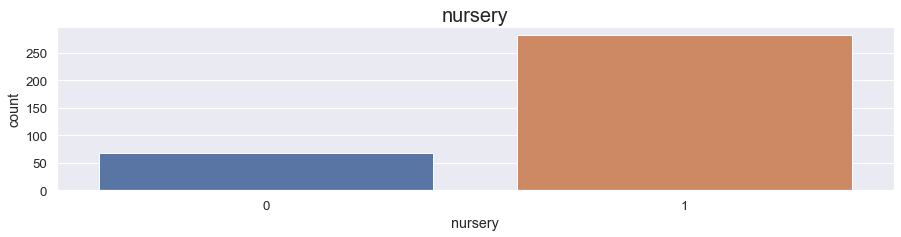

In [53]:
stud_math['nursery'].fillna('yes', inplace=True)
yes_no('nursery')
display_data('nursery', size=(15, 3))

### Higher
higher — хочет получить высшее образование (yes или no)

Для показателя higher количество пропущенных значений: 19 из 350 
Пропущенных значений 5.4 %


yes    318
no      13
Name: higher, dtype: int64

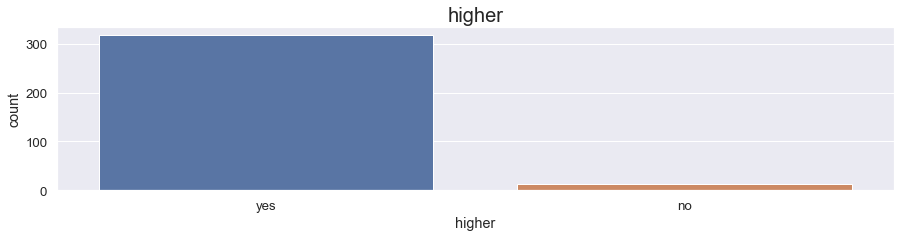

In [54]:
display_data('higher', size=(15, 3))

Заменим пропуски 'yes'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя higher количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


1    337
0     13
Name: higher, dtype: int64

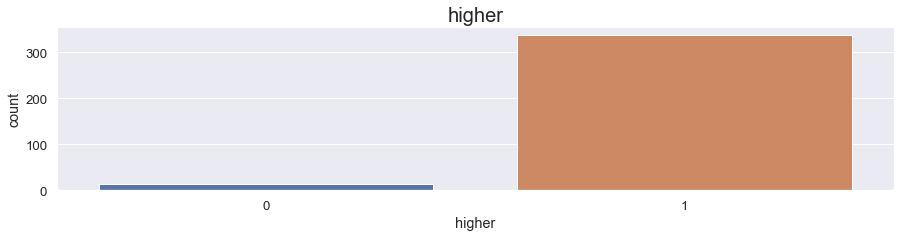

In [55]:
stud_math['higher'].fillna('yes', inplace=True)
yes_no('higher')
display_data('higher', size=(15, 3))

### Internet
internet — наличие интернета дома (yes или no)

Для показателя internet количество пропущенных значений: 29 из 350 
Пропущенных значений 8.3 %


yes    272
no      49
Name: internet, dtype: int64

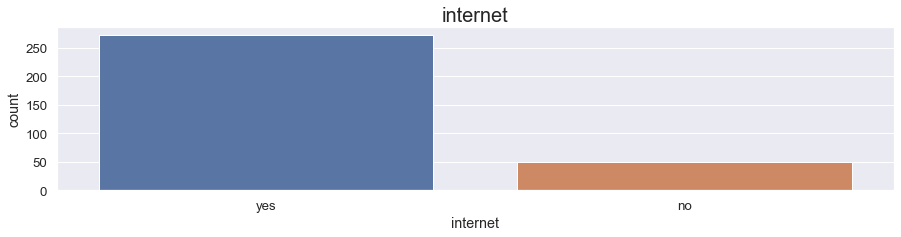

In [56]:
display_data('internet', size=(15, 3))

Заменим пропуски 'yes'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя internet количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


1    301
0     49
Name: internet, dtype: int64

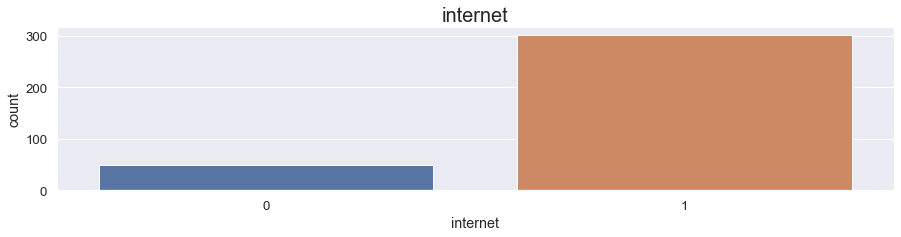

In [57]:
stud_math['internet'].fillna('yes', inplace=True)
yes_no('internet')
display_data('internet', size=(15, 3))

### Romantic
romantic — в романтических отношениях (yes или no)

Для показателя romantic количество пропущенных значений: 29 из 350 
Пропущенных значений 8.3 %


no     218
yes    103
Name: romantic, dtype: int64

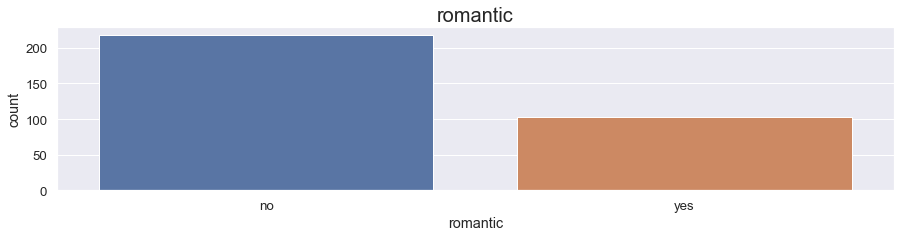

In [58]:
display_data('romantic', size=(15, 3))

Заменим пропуски 'no'. Приведём к бинарному виду 'yes'=1, 'no'=0.

Для показателя romantic количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


0    247
1    103
Name: romantic, dtype: int64

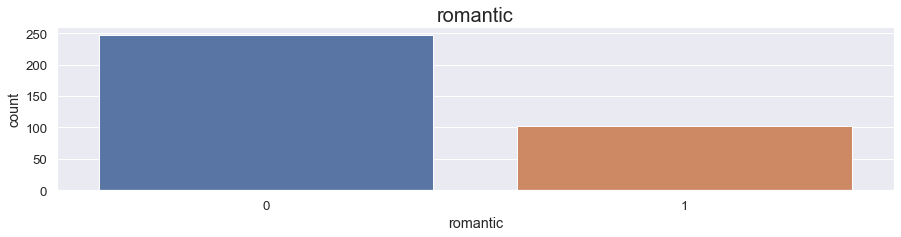

In [59]:
stud_math['romantic'].fillna('no', inplace=True)
yes_no('romantic')
display_data('romantic', size=(15, 3))

### Famrel
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Для показателя famrel количество пропущенных значений: 24 из 350 
Пропущенных значений 6.9 %


 4.0    162
 5.0     88
 3.0     55
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

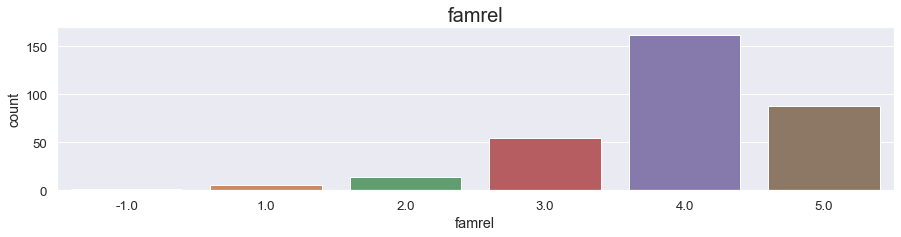

In [60]:
display_data('famrel', size=(15, 3))

Присутствует явный выброс '-1.0', очевидная опечатка, заменим на '1.0'. Пропуски заменим на значение медианы.

Для показателя famrel количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


4.0    186
5.0     88
3.0     55
2.0     14
1.0      7
Name: famrel, dtype: int64

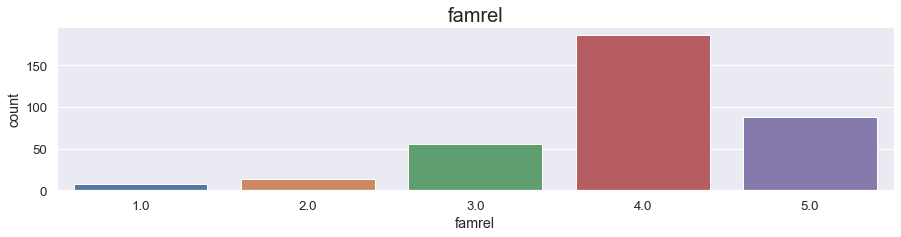

In [61]:
stud_math.famrel = stud_math.famrel.apply(
    lambda x: float(str(x).replace('-1.0', '1.0')))
stud_math['famrel'].fillna(stud_math['famrel'].median(), inplace=True)
display_data('famrel', size=(15, 3))

### Freetime
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

Для показателя freetime количество пропущенных значений: 8 из 350 
Пропущенных значений 2.3 %


3.0    132
4.0    101
2.0     58
5.0     35
1.0     16
Name: freetime, dtype: int64

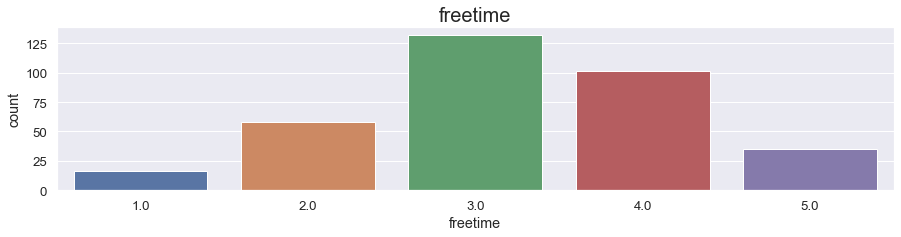

In [62]:
display_data('freetime', size=(15, 3))

Пропуски заменим на значение медианы.

Для показателя freetime количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


3.0    140
4.0    101
2.0     58
5.0     35
1.0     16
Name: freetime, dtype: int64

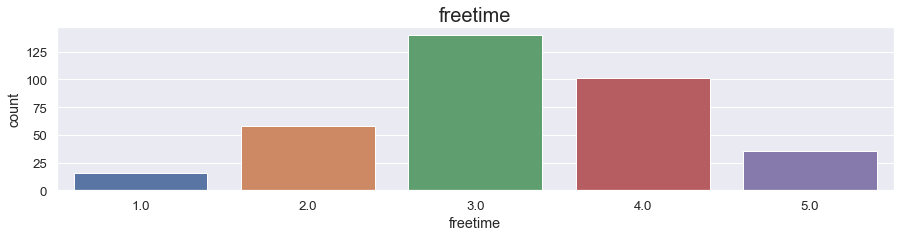

In [63]:
stud_math['freetime'].fillna(stud_math['freetime'].median(), inplace=True)
display_data('freetime', size=(15, 3))

### Goout
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Для показателя goout количество пропущенных значений: 6 из 350 
Пропущенных значений 1.7 %


3.0    118
2.0     91
4.0     74
5.0     42
1.0     19
Name: goout, dtype: int64

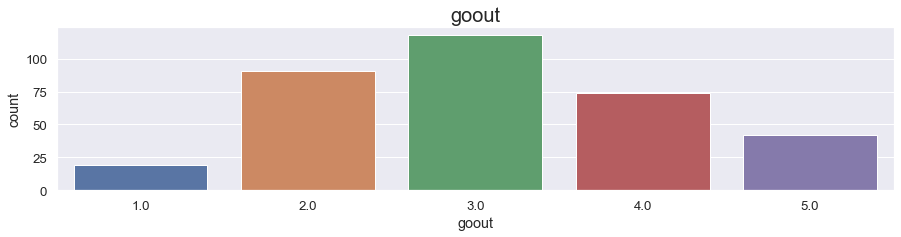

In [64]:
display_data('goout', size=(15, 3))

Пропуски заменим на значение медианы.

Для показателя goout количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


3.0    124
2.0     91
4.0     74
5.0     42
1.0     19
Name: goout, dtype: int64

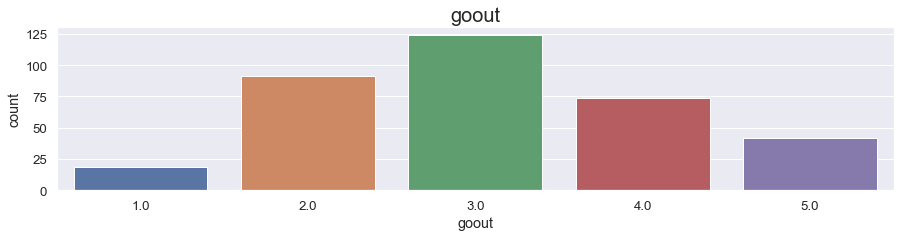

In [65]:
stud_math['goout'].fillna(stud_math['goout'].median(), inplace=True)
display_data('goout', size=(15, 3))

### Health
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Для показателя health количество пропущенных значений: 13 из 350 
Пропущенных значений 3.7 %


5.0    124
3.0     81
4.0     53
1.0     44
2.0     35
Name: health, dtype: int64

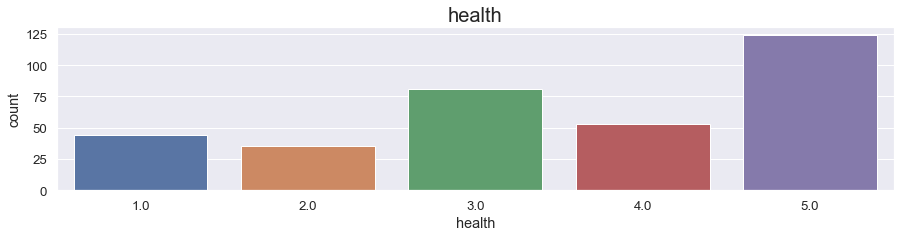

In [66]:
display_data('health', size=(15, 3))

Пропуски заменим на значение медианы.

Для показателя health количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


5.0    124
3.0     81
4.0     66
1.0     44
2.0     35
Name: health, dtype: int64

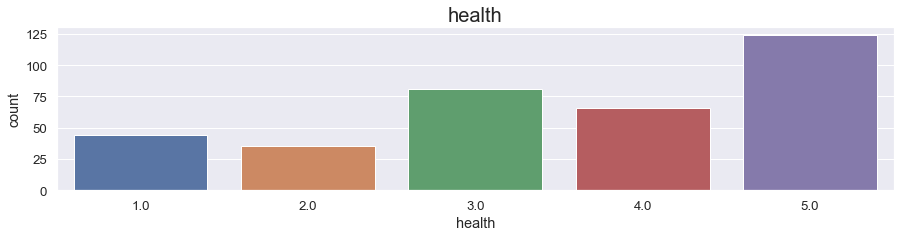

In [67]:
stud_math['health'].fillna(stud_math['health'].median(), inplace=True)
display_data('health', size=(15, 3))

### Absences
absences — количество пропущенных занятий

Для показателя absences количество пропущенных значений: 10 из 350 
Пропущенных значений 2.9 %


0.0      74
2.0      60
4.0      51
6.0      30
8.0      20
10.0     17
14.0     12
12.0     12
16.0      7
3.0       7
7.0       6
18.0      5
5.0       5
20.0      4
9.0       3
1.0       3
13.0      2
15.0      2
22.0      2
11.0      2
40.0      1
38.0      1
56.0      1
23.0      1
24.0      1
25.0      1
385.0     1
17.0      1
75.0      1
21.0      1
212.0     1
28.0      1
19.0      1
26.0      1
30.0      1
54.0      1
Name: absences, dtype: int64

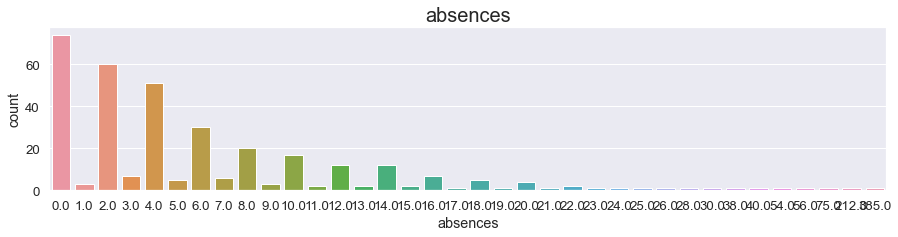

In [68]:
display_data('absences', size=(15, 3))

Проверим на выбросы

In [69]:
outliers('absences')

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


Отфильтруем выбросы, приведём значения ячеек с выбросами к значению медианы. Таким же способом заполним пропуски.

Для показателя absences количество пропущенных значений: 0 из 350 
Пропущенных значений 0.0 %


c:\users\olga_\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4.0     87
0.0     74
2.0     60
6.0     30
8.0     20
10.0    17
12.0    12
14.0    12
3.0      7
16.0     7
7.0      6
5.0      5
9.0      3
1.0      3
11.0     2
15.0     2
13.0     2
17.0     1
Name: absences, dtype: int64

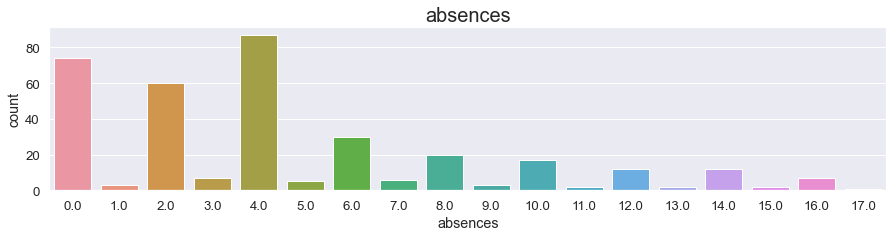

In [70]:
stud_math['absences'].fillna(stud_math['absences'].median(), inplace=True)
stud_math.absences.loc[stud_math.absences > 17] = stud_math.absences.median()
display_data('absences', size=(15, 3))

## Корреляционный анализ

Построим темпловую карту чтобы оценить корреляцию параметров с ключевым, для нас, score.

<AxesSubplot:>

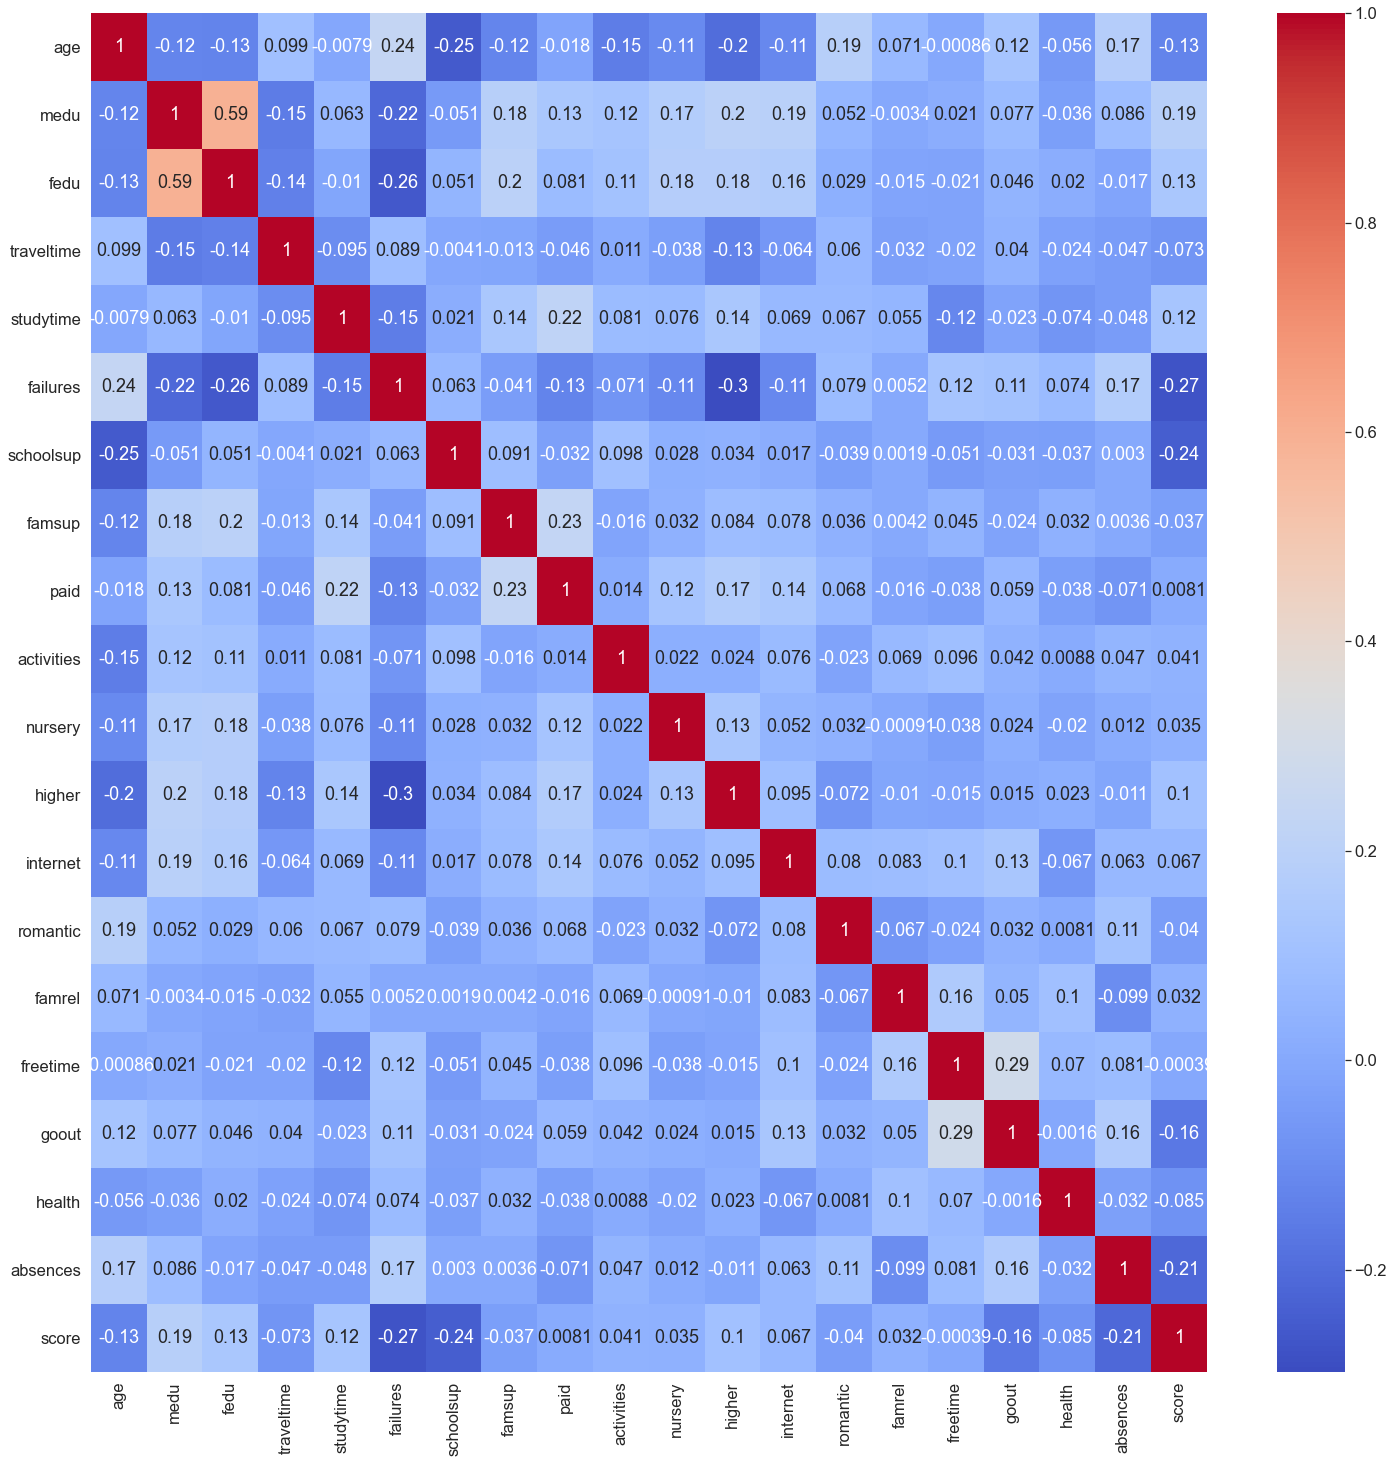

In [71]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25, 25))
sns.heatmap(stud_math.corr(), annot=True, cmap='coolwarm')

Сильно коррелируются между собой образование отца и матери, можно оставить только один параметр.

In [72]:
stud_math.drop(columns=['medu'], inplace=True)

In [73]:
stud_corr = stud_math.corr()
display(abs(stud_corr.score).sort_values(ascending=False))

score         1.000000
failures      0.273879
schoolsup     0.243173
absences      0.213435
goout         0.164574
fedu          0.134005
age           0.128171
studytime     0.124964
higher        0.104890
health        0.084795
traveltime    0.073326
internet      0.066849
activities    0.040575
romantic      0.040324
famsup        0.036532
nursery       0.034666
famrel        0.031927
paid          0.008110
freetime      0.000392
Name: score, dtype: float64

Наибольшее влияние на количество баллов по математике оказывают следующие признаки - failures, schoolsup, absences, goout, fedu, age, studytime. 

## Анализ номинативных переменных

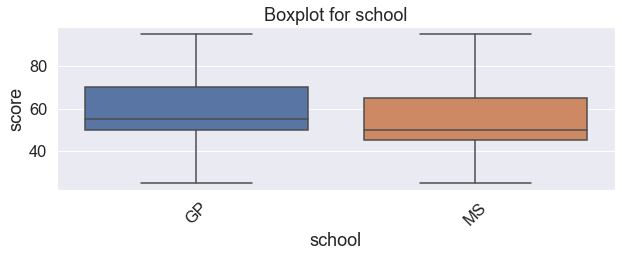

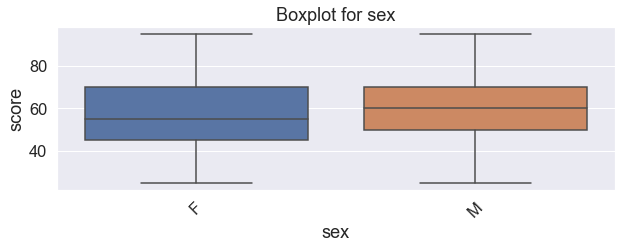

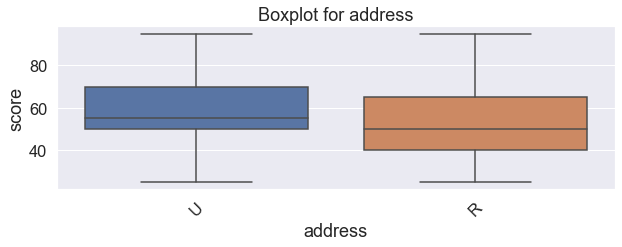

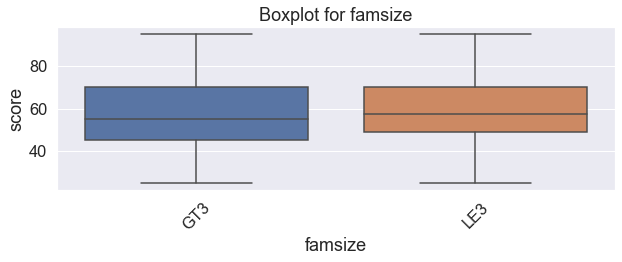

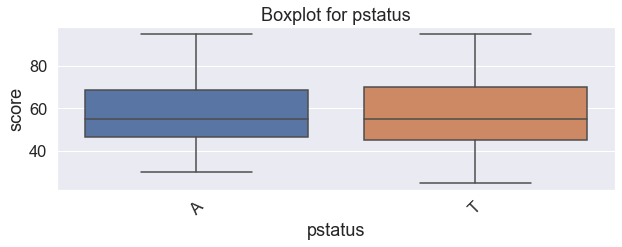

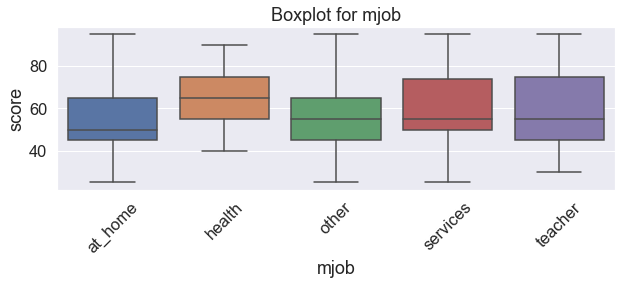

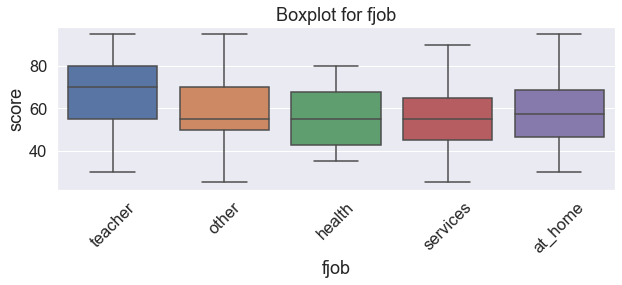

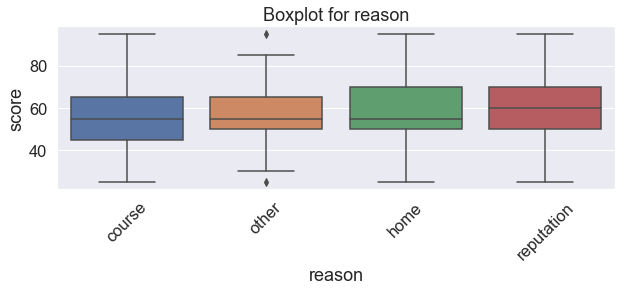

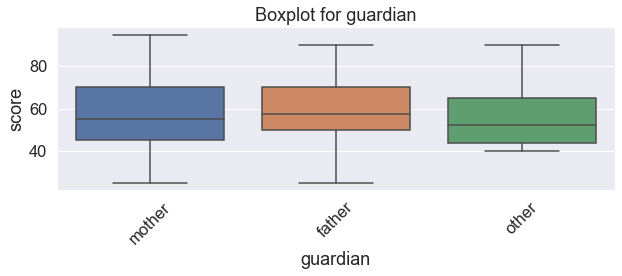

In [74]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian']:
    get_boxplot(col)

In [75]:
for column in ['school', 'sex', 'address', 'famsize', 'pstatus',
               'mjob', 'fjob', 'reason', 'guardian']:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки fjob


In [76]:
stud_math_for_model = stud_math.loc[:, ['failures', 'schoolsup', 'absences', 'goout',
                                        'fedu', 'age', 'studytime', 'address', 'fjob',
                                        'score']]

Итак, в результате EDA для выявления влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска, были получены следующие выводы:

 * В данных достаточно мало пустых значений, максимальное количество пропусков было вявлено в столбце pstatus и составляло 11.7 % от общего количества значений в столбце.

 * Выбросы найдены только в столбцах fedu, famrel - опечатки и в столбце absences уникальные значения, которые мы тоже заменили. 

 * Cамые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это ***failures, schoolsup, absences, goout, fedu, age, studytime, address, fjob***.
